In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline


<h1>About the Data</h1>

The data that I used for this analysis and project is from the Federal Reserve Economic Data (FRED) site of the St. Louis 
Federal Reserve (St. Louis Fed). I will be evaluating the average monthly price on groceries in urban areas. There will be 
comparisons between each of the grocery items being compared to each other as well as to the monthly US Urban Consumer 
Price Index (CPI). 

All data came in the form of Comma Separate Value (CSV) files.

The grocery items being compared and run through for exploratory data analysis are: 
white bread, ground beef, eggs, whole milk, and bananas. 
Another column, urban_cpi, is the average urban Consumer Price Index (CPI) for spending on groceries in urban US areas. 


There were some empty data points with each of the CSV files that I was working with, but they have been edited to make 
sure that any empty values were filled or removed accordingly. There were six CSV files combined into one CSV file 
containing all of the columns of average grocery items' prices. The dates were also reformatted in the CSV files using
Microsoft Excel where the dates, initially listed in its respective column in the form <b>M/D/YYYY</b> are now listed in 
the form <b>YYYY/MM/DD</b>.

All economic data from the Federal Reserve can be found at https://fred.stlouisfed.org


In [2]:
"""
Get the FRED dataset, a collection of average prices of groceries data in US
from February 1999 to February 2024

Read the .csv file, then get the dataframe's strctural info
Includes columns' names, index ranges for each column, and their data types
"""
groceries_df = pd.read_csv("fred_groceries_021999_022024.csv", encoding='utf-8')
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         301 non-null    object 
 1   white_bread  301 non-null    float64
 2   ground_beef  301 non-null    float64
 3   egg          301 non-null    float64
 4   whole_milk   301 non-null    float64
 5   banana       301 non-null    float64
 6   urban_cpi    301 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [3]:
# Get a sample of what the data looks like by calling the dataframe
# Call the dataframe's first 5 rows using head()
groceries_df.head()

,DATE,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
0,1999-02-01,0.880,1.431,1.078,3.004,0.509,163.3
1,1999-03-01,0.883,1.404,1.005,3.003,0.506,163.3
2,1999-04-01,0.897,1.429,0.942,2.707,0.482,163.4
3,1999-05-01,0.886,1.444,0.900,2.716,0.492,163.7
4,1999-06-01,0.885,1.448,0.949,2.704,0.502,163.6


In [4]:
# Gets the names of each of the colums in this pandas dataframe
groceries_df.columns

Index(['DATE', 'white_bread', 'ground_beef', 'egg', 'whole_milk', 'banana',
       'urban_cpi'],
      dtype='object')

In [5]:
# Gets the shape of the dataframe
groceries_df.shape

(301, 7)

In [6]:
# Gets the descriptive statistics from the dataframe
groceries_df.describe()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,1.297900,2.999774,1.651575,3.289449,0.561970,227.267920
std,0.258624,1.078457,0.579640,0.392196,0.049593,42.223027
min,0.878000,0.000000,0.838000,2.656000,0.469000,163.300000
25%,1.046000,2.196000,1.257000,2.964000,0.509000,190.400000
50%,1.358000,2.818000,1.599000,3.241000,0.574000,229.554000
75%,1.419000,3.841000,1.920000,3.557000,0.601000,251.238000
max,2.033000,5.353000,4.823000,4.218000,0.643000,327.731000


In [7]:
'''
Get a correlation table
Create a new dataframe, no_date_groceries, to be set to groceries_df.
Then, drop the DATE column and create a correlation table. 
'''

no_date_groceries = groceries_df.drop(['DATE'], axis=1)

In [8]:
# Create a correlation table with the numbers and with using heatmap from Seaborn. 
no_date_groceries.corr()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
white_bread,1.000000,0.833918,0.792305,0.798335,0.879341,0.931455
ground_beef,0.833918,1.000000,0.675822,0.628957,0.699347,0.949594
egg,0.792305,0.675822,1.000000,0.765661,0.700878,0.732184
whole_milk,0.798335,0.628957,0.765661,1.000000,0.694529,0.698135
banana,0.879341,0.699347,0.700878,0.694529,1.000000,0.799794
urban_cpi,0.931455,0.949594,0.732184,0.698135,0.799794,1.000000


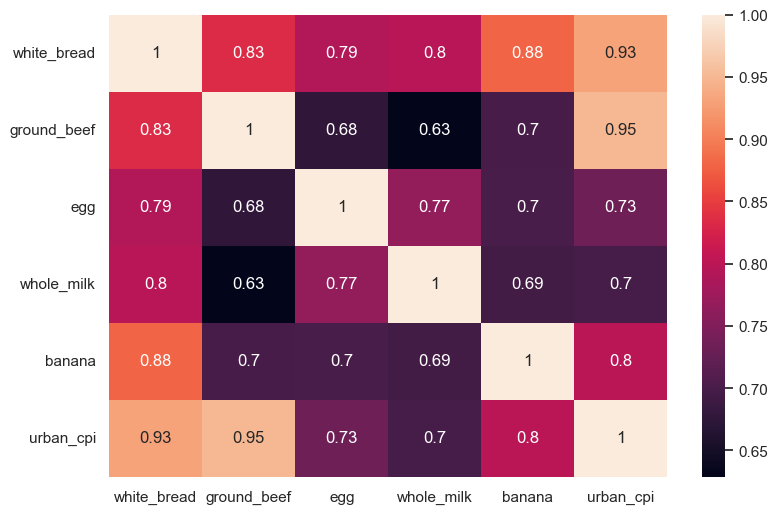

In [9]:
# Visualize the correlation table via heatmap from seaborn library. 
# Numeric labels also included. 

plt.figure(figsize=(9,6))
sns.heatmap(no_date_groceries.corr(), annot=True)
plt.show()

In [10]:
# Get the covariance of the grocery items
no_date_groceries.cov()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
white_bread,0.066886,0.232592,0.118774,0.080976,0.011278,10.171383
ground_beef,0.232592,1.163069,0.422468,0.266027,0.037404,43.240440
egg,0.118774,0.422468,0.335983,0.174060,0.020147,17.919599
whole_milk,0.080976,0.266027,0.174060,0.153818,0.013509,11.560904
banana,0.011278,0.037404,0.020147,0.013509,0.002459,1.674729
urban_cpi,10.171383,43.240440,17.919599,11.560904,1.674729,1782.784039


<b>NOTE:</b> No dates are shown in x-axis of table; there are 25 years of data, or 300 months.
The dates range from February 1999 (month 1) to February 2024 (month 300).

Create a legend for each of the items picked and plot their average price per month.

<b>NOTE:</b> The price of ground beef for one of the months is listed as 0 because initially there was no listed 
average value for that month. 



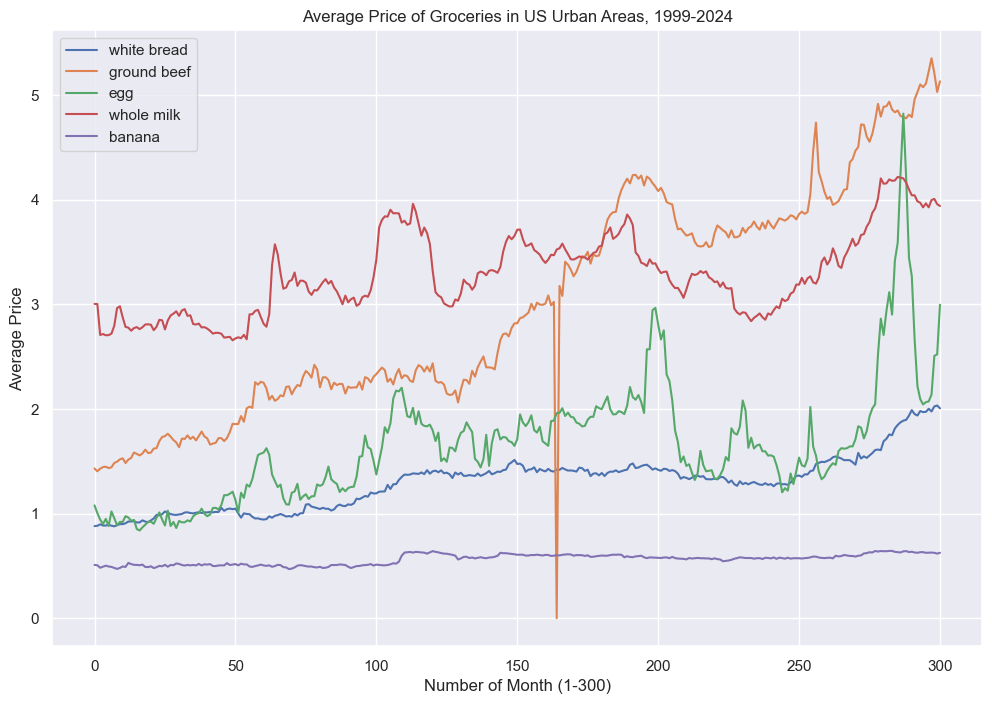

In [11]:
plt.figure(figsize=(12,8))
plt.plot(groceries_df['white_bread'])
plt.plot(groceries_df['ground_beef'])
plt.plot(groceries_df['egg'])
plt.plot(groceries_df['whole_milk'])
plt.plot(groceries_df['banana'])
plt.legend(['white bread', 'ground beef', 'egg', 'whole milk', 'banana'])
plt.xlabel("Number of Month (1-300)")
plt.ylabel("Average Price")
plt.title("Average Price of Groceries in US Urban Areas, 1999-2024")
plt.show()

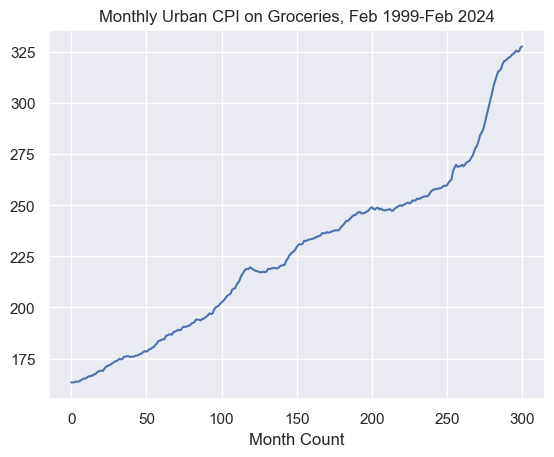

In [12]:
# Line graph of Urban CPI from Feb 1999 to Feb 2024

plt.plot(groceries_df['urban_cpi'])
plt.title("Monthly Urban CPI on Groceries, Feb 1999-Feb 2024")
plt.xlabel("Month Count")
plt.show()

In [13]:
# Use groupby to get the average price of each item by date

groceries_df.groupby(['DATE']).mean()

,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi
DATE,,,,,,
1999-02-01,0.880,1.431,1.078,3.004,0.509,163.300
1999-03-01,0.883,1.404,1.005,3.003,0.506,163.300
1999-04-01,0.897,1.429,0.942,2.707,0.482,163.400
1999-05-01,0.886,1.444,0.900,2.716,0.492,163.700
1999-06-01,0.885,1.448,0.949,2.704,0.502,163.600
...,...,...,...,...,...,...
2023-10-01,2.002,5.226,2.072,3.927,0.626,325.731
2023-11-01,1.976,5.353,2.138,3.997,0.627,325.172
2023-12-01,2.024,5.210,2.507,4.008,0.625,325.409


In [14]:
# Use groupby and arrange average price of each item by date and urban CPI, using mean

groceries_df.groupby(['DATE', 'urban_cpi']).mean()

,,white_bread,ground_beef,egg,whole_milk,banana
DATE,urban_cpi,,,,,
1999-02-01,163.300,0.880,1.431,1.078,3.004,0.509
1999-03-01,163.300,0.883,1.404,1.005,3.003,0.506
1999-04-01,163.400,0.897,1.429,0.942,2.707,0.482
1999-05-01,163.700,0.886,1.444,0.900,2.716,0.492
1999-06-01,163.600,0.885,1.448,0.949,2.704,0.502
...,...,...,...,...,...,...
2023-10-01,325.731,2.002,5.226,2.072,3.927,0.626
2023-11-01,325.172,1.976,5.353,2.138,3.997,0.627
2023-12-01,325.409,2.024,5.210,2.507,4.008,0.625


In [15]:
# Use groupby and arrange average price of each item by date and urban CPI, using median

groceries_df.groupby(['DATE', 'urban_cpi']).mean()

,,white_bread,ground_beef,egg,whole_milk,banana
DATE,urban_cpi,,,,,
1999-02-01,163.300,0.880,1.431,1.078,3.004,0.509
1999-03-01,163.300,0.883,1.404,1.005,3.003,0.506
1999-04-01,163.400,0.897,1.429,0.942,2.707,0.482
1999-05-01,163.700,0.886,1.444,0.900,2.716,0.492
1999-06-01,163.600,0.885,1.448,0.949,2.704,0.502
...,...,...,...,...,...,...
2023-10-01,325.731,2.002,5.226,2.072,3.927,0.626
2023-11-01,325.172,1.976,5.353,2.138,3.997,0.627
2023-12-01,325.409,2.024,5.210,2.507,4.008,0.625


In [16]:
"""Add two new columns: 
- month
- year

Get these from the DATE object column, listed as strings
"""

groceries_df['month'] = groceries_df.DATE.apply(lambda x: int(x[5:7]))
groceries_df['year'] = groceries_df.DATE.apply(lambda x: int(x[0:4]))

In [17]:
groceries_df['month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

In [18]:
groceries_df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024], dtype=int64)

In [19]:
# Use groupby to get the average price of each item by date and month

groceries_df.groupby(['DATE', 'month']).mean()

,,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi,year
DATE,month,,,,,,,
1999-02-01,2,0.880,1.431,1.078,3.004,0.509,163.300,1999.0
1999-03-01,3,0.883,1.404,1.005,3.003,0.506,163.300,1999.0
1999-04-01,4,0.897,1.429,0.942,2.707,0.482,163.400,1999.0
1999-05-01,5,0.886,1.444,0.900,2.716,0.492,163.700,1999.0
1999-06-01,6,0.885,1.448,0.949,2.704,0.502,163.600,1999.0
...,...,...,...,...,...,...,...,...
2023-10-01,10,2.002,5.226,2.072,3.927,0.626,325.731,2023.0
2023-11-01,11,1.976,5.353,2.138,3.997,0.627,325.172,2023.0
2023-12-01,12,2.024,5.210,2.507,4.008,0.625,325.409,2023.0


In [20]:
groceries_df.groupby(['DATE', 'month']).median()

,,white_bread,ground_beef,egg,whole_milk,banana,urban_cpi,year
DATE,month,,,,,,,
1999-02-01,2,0.880,1.431,1.078,3.004,0.509,163.300,1999.0
1999-03-01,3,0.883,1.404,1.005,3.003,0.506,163.300,1999.0
1999-04-01,4,0.897,1.429,0.942,2.707,0.482,163.400,1999.0
1999-05-01,5,0.886,1.444,0.900,2.716,0.492,163.700,1999.0
1999-06-01,6,0.885,1.448,0.949,2.704,0.502,163.600,1999.0
...,...,...,...,...,...,...,...,...
2023-10-01,10,2.002,5.226,2.072,3.927,0.626,325.731,2023.0
2023-11-01,11,1.976,5.353,2.138,3.997,0.627,325.172,2023.0
2023-12-01,12,2.024,5.210,2.507,4.008,0.625,325.409,2023.0


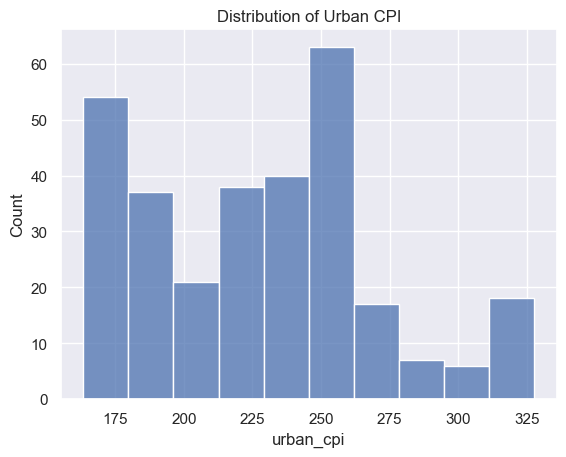

In [21]:
# Return a histogram of the Urban CPI numbers
sns.histplot(groceries_df['urban_cpi'])
plt.title('Distribution of Urban CPI')
plt.show()

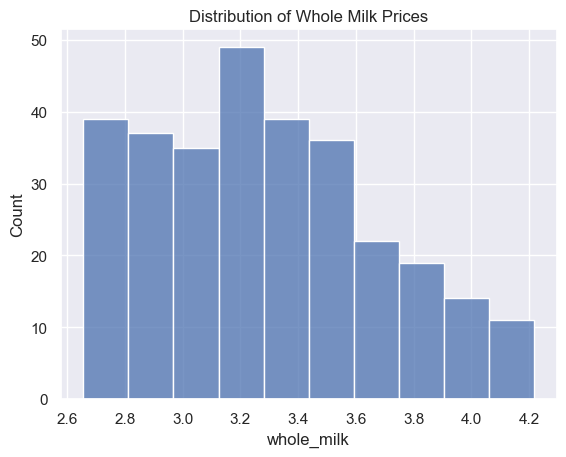

In [22]:
sns.histplot(groceries_df['whole_milk'])
plt.title('Distribution of Whole Milk Prices')
plt.show()

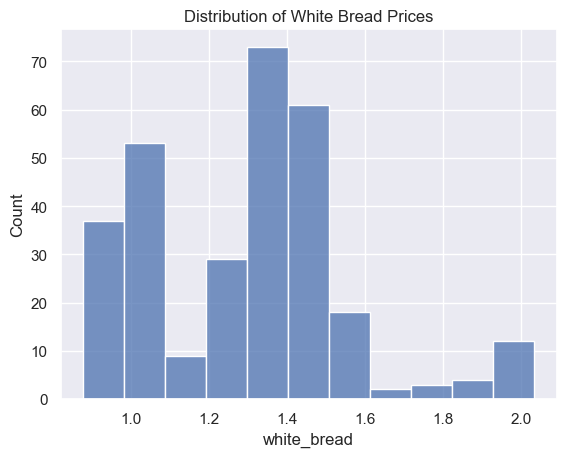

In [23]:
sns.histplot(groceries_df['white_bread'])
plt.title('Distribution of White Bread Prices')
plt.show()

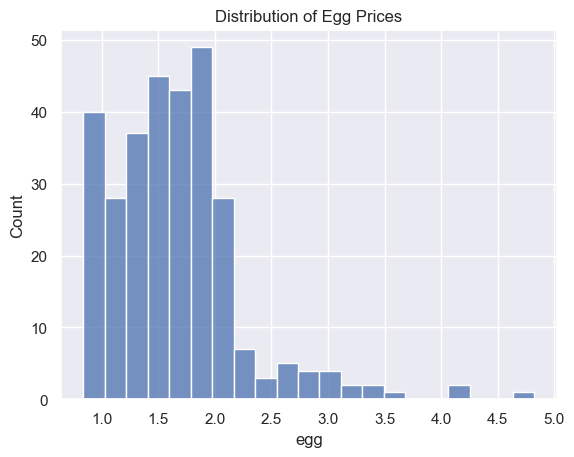

In [24]:
sns.histplot(groceries_df['egg'])
plt.title('Distribution of Egg Prices')
plt.show()